In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from IPython.display import display, Math

In [2]:
B = 5e9 # Bitrate [bit/s]
L = 10e3 # Fiber len [m]
beta2 = -0.022e-24 # GVD parameter [s^2/m]
dW = 5e9 # Pulse bandwidth [1/s]
dt = 45e-12 # Time delay multipler [s]

NT = int((1/B + np.abs(L*beta2*dW))/dt) # Number of taps
print(f'NT = int({1/(B*dt)} + |{L*beta2*dW/dt}|)')

display(Math('B = %5.2f ~Gbps ~~~|~~~ L = %5.2f ~km ~~~|~~~ΔW = %5.2f~GHz ~~~|~~~Δt = %5.2f~ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12)))
display(Math('N_T = %5.0f' %(NT)))

NT = int(4.444444444444445 + |-0.024444444444444442|)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

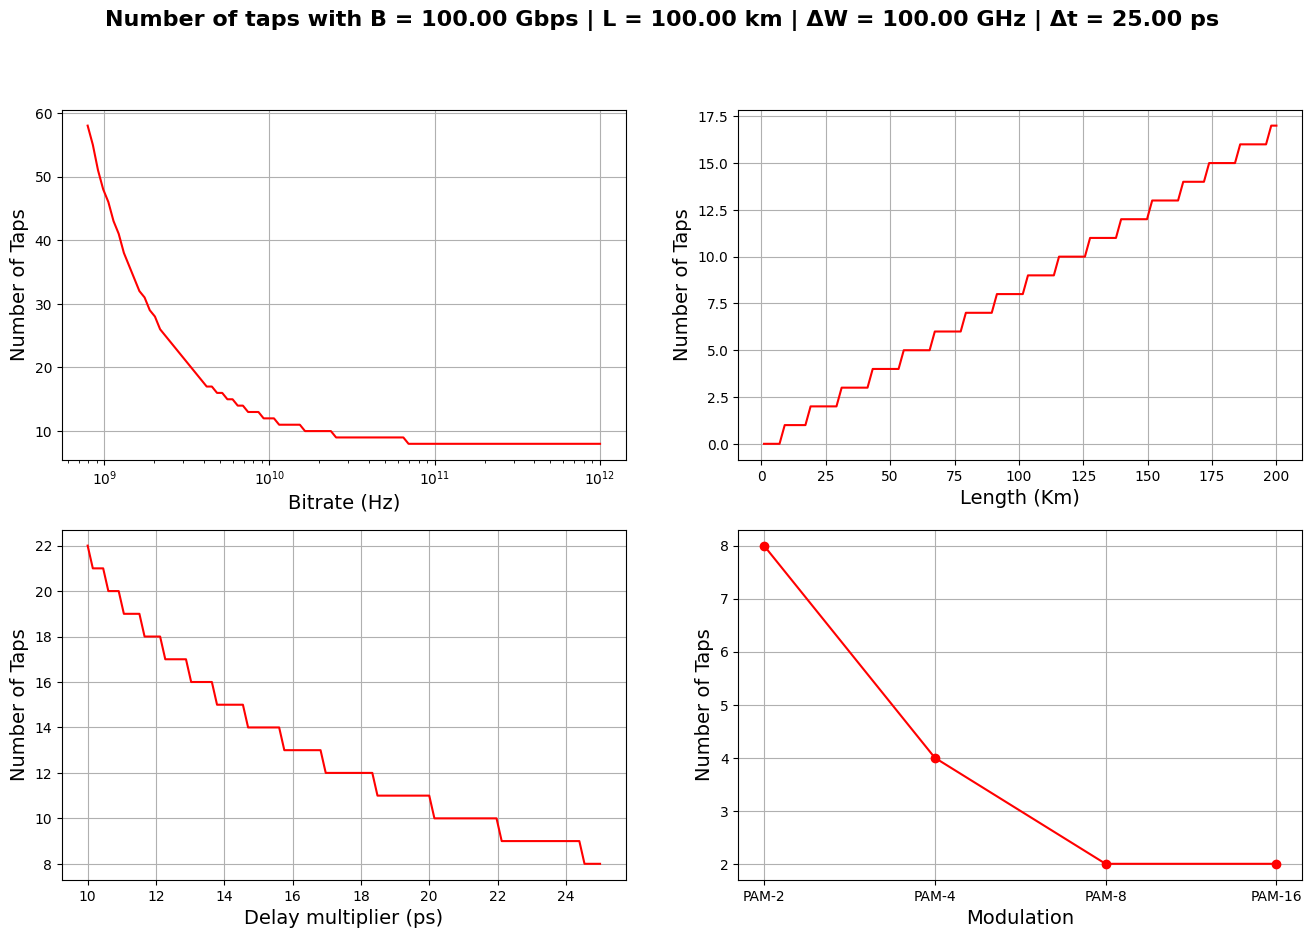

In [86]:
Barray = np.logspace(8.9,12,100)
LArray = np.linspace(1e3,200e3,100)
dtArray = np.linspace(10e-12,25e-12,100)
dWArray = {'PAM-2':1 , 'PAM-4':2, 'PAM-8':3, 'PAM-16':4}

NT1 = np.floor((1/Barray + np.abs(L*beta2*dW))/dt) # Number of taps (varying B)
NT2 = np.floor((1/B + np.abs(LArray*beta2*dW))/dt) # Number of taps (varying L)
NT3 = np.floor((1/B + np.abs(L*beta2*dW))/dtArray) # Number of taps (varying dt)
NT4 = np.floor((1/B + np.abs(L*beta2*dW/np.array(list(dWArray.values())) )/dt)) # Number of taps (varying modulation / dw)

figure,ax=plt.subplots(2, 2,figsize=(16,10))
figure.suptitle('Number of taps with B = %5.2f Gbps | L = %5.2f km | ΔW = %5.2f GHz | Δt = %5.2f ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12),fontsize=16, fontweight="bold")

ax[0][0].plot(Barray, NT1, 'r', label='Tn')
ax[0][0].set_xlabel(r'Bitrate (Hz)', fontsize=14)
ax[0][0].set_ylabel(r'Number of Taps', fontsize=14)
ax[0][0].set_xscale('log')
ax[0][0].grid(True)

ax[0][1].plot(LArray*1e-3, NT2, 'r', label='Tn')
ax[0][1].set_xlabel(r'Length (Km)', fontsize=14)
ax[0][1].set_ylabel(r'Number of Taps', fontsize=14)
ax[0][1].grid(True)

ax[1][0].plot(dtArray*1e12, NT3, 'r', label='Tn')
ax[1][0].set_xlabel(r'Delay multiplier (ps)', fontsize=14)
ax[1][0].set_ylabel(r'Number of Taps', fontsize=14)
ax[1][0].grid(True)

ax[1][1].plot(np.arange(len(dWArray.values())), NT4, 'ro-', label='Tn')
ax[1][1].set_xlabel(r'Modulation', fontsize=14)
ax[1][1].set_ylabel(r'Number of Taps', fontsize=14)
ax[1][1].set_xticks(np.arange(len(dWArray.values())), labels=dWArray.keys())
ax[1][1].grid(True)

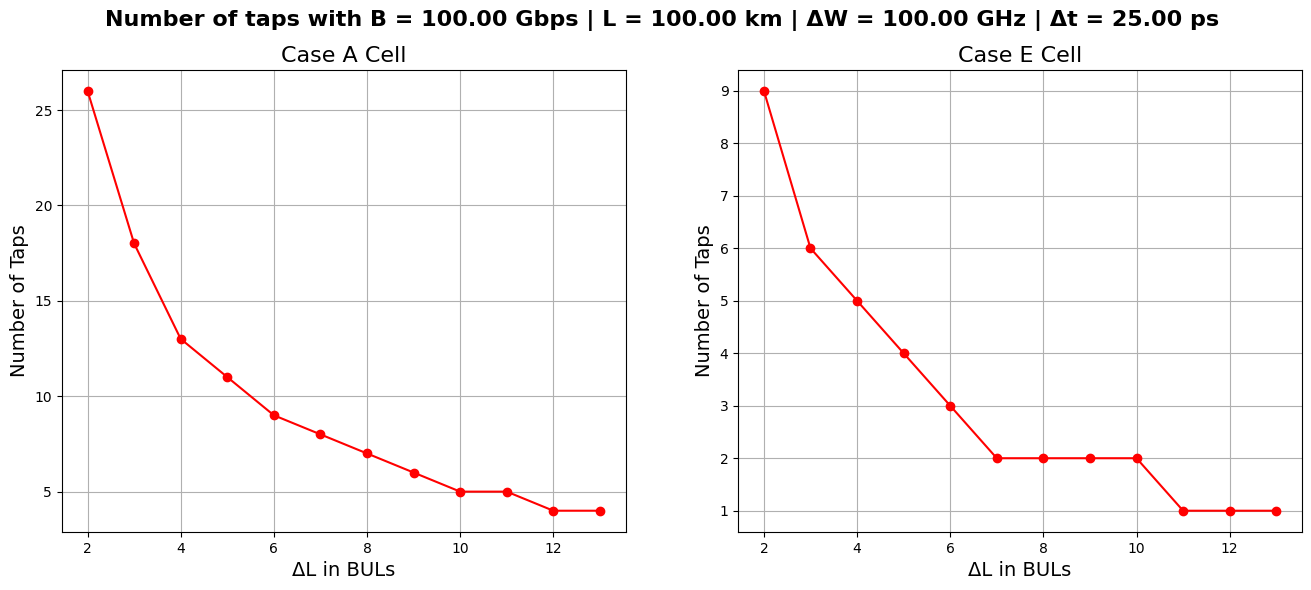

In [102]:
figure,ax=plt.subplots(1, 2,figsize=(16,6))
figure.suptitle('Number of taps with B = %5.2f Gbps | L = %5.2f km | ΔW = %5.2f GHz | Δt = %5.2f ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12),fontsize=16, fontweight="bold")

dLs = 12  # max ΔL in BULs
startL = 2 # min ΔL in BULs
dtArray1 = np.linspace(startL*4.18e-12,dLs*4.18e-12,dLs)
dtArray2 = np.linspace(startL*11.25e-12,dLs*11.25e-12,dLs)

NT5 = np.floor((1/B + np.abs(L*beta2*dW))/dtArray1) # Number of taps (varying dt case A)
NT6 = np.floor((1/B + np.abs(L*beta2*dW))/dtArray2) # Number of taps (varying dt case E)

ax[0].plot(np.arange(dLs)+startL, NT5, 'ro-', label='Tn')
ax[0].set_title('Case A Cell', fontsize=16)
ax[0].set_xlabel(r'ΔL in BULs', fontsize=14)
ax[0].set_ylabel(r'Number of Taps', fontsize=14)
ax[0].grid(True)

ax[1].plot(np.arange(dLs)+startL, NT6, 'ro-', label='Tn')
ax[1].set_title('Case E Cell', fontsize=16)
ax[1].set_xlabel(r'ΔL in BULs', fontsize=14)
ax[1].set_ylabel(r'Number of Taps', fontsize=14)
ax[1].grid(True)

# Models comparison

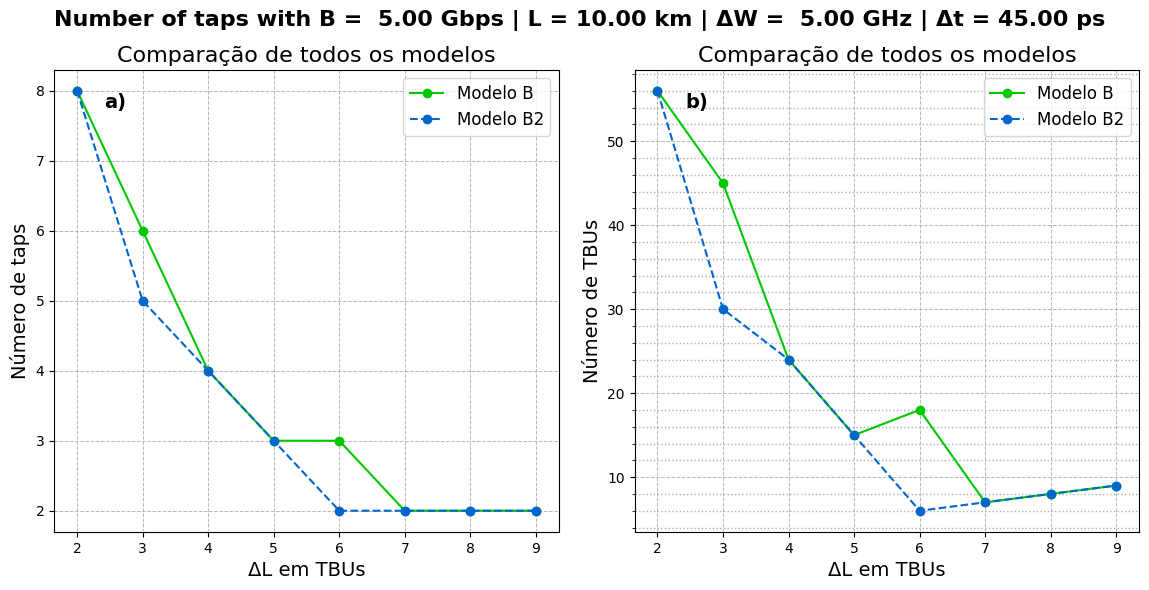

In [23]:
B = 5e9 # Bitrate [bit/s]
L = 10e3 # Fiber len [m]
beta2 = -0.022e-24 # GVD parameter [s^2/m]
dW = 5e9 # Pulse bandwidth [1/s]
dtA = 4.18e-12 # Time delay multipler [s]
dtB = 11.25e-12 # Time delay multipler [s]
dtB2 = 12.50e-12 # Time delay multipler [s]

figure,ax=plt.subplots(1, 2,figsize=(14,6))
figure.suptitle('Number of taps with B = %5.2f Gbps | L = %5.2f km | ΔW = %5.2f GHz | Δt = %5.2f ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12),fontsize=16, fontweight="bold")

dLs = 8  # max ΔL in BULs
startL = 2 # min ΔL in BULs
dtArrayA = np.linspace(startL,dLs,dLs)*dtA
dtArrayB = np.linspace(startL,dLs,dLs)*dtB
dtArrayB2 = np.linspace(startL,dLs,dLs)*dtB2

NTA = np.floor((1/B + np.abs(L*beta2*dW))/dtArrayA) # Number of taps (varying dt case A)
NTB = np.floor((1/B + np.abs(L*beta2*dW))/dtArrayB) # Number of taps (varying dt case B)
NTB2 = np.floor((1/B + np.abs(L*beta2*dW))/dtArrayB2) # Number of taps (varying dt case B2)

# ax[0].plot(np.arange(dLs)+startL, NTA, 'o-', label='Modelo A',color='#CC0000')
ax[0].plot(np.arange(dLs)+startL, NTB, 'o-', label='Modelo B',color='#00C800')
ax[0].plot(np.arange(dLs)+startL, NTB2, 'o--', label='Modelo B2',color='#0066CC')
ax[0].set_title('Comparação de todos os modelos', fontsize=16)
ax[0].set_xlabel(r'ΔL em TBUs', fontsize=14)
ax[0].set_ylabel(r'Número de taps', fontsize=14)
ax[0].grid(which='major', linestyle='--', linewidth=0.7, alpha=0.9)
ax[0].grid(which='minor', axis='y', linestyle=':', linewidth=1, alpha=1)
ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(1))  # ticks menores a cada 0.2 no eixo x
ax[0].legend(fontsize=12)


# dLs = 6  # max ΔL in BULs
# startL = 2 # min ΔL in BULs
# dtArrayB = np.linspace(startL,dLs,100)*dtB
# dtArrayB2 = np.linspace(startL,dLs,100)*dtB2
# NTB = (1/B + np.abs(L*beta2*dW))/dtArrayB # Number of taps (varying dt case B)
# NTB2 = (1/B + np.abs(L*beta2*dW))/dtArrayB2 # Number of taps (varying dt case B2)

# ax[1].plot(np.linspace(startL,dLs,100), NTB, '-', label='Modelo B',color='#00C800')
# ax[1].plot(np.linspace(startL,dLs,100), NTB2, '-', label='Modelo B2',color='#0066CC')
# ax[1].set_title('Comparação de todos os modelos', fontsize=16)
# ax[1].set_xlabel(r'ΔL em TBUs', fontsize=14)
# ax[1].set_ylabel(r'Número de taps', fontsize=14)
# ax[1].grid(which='major', linestyle='--', linewidth=0.7, alpha=0.9)
# ax[1].grid(which='minor', axis='y', linestyle=':', linewidth=1, alpha=1)
# ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(1))  
# ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))  
# ax[1].legend(fontsize=12)

dLs = 8  # max ΔL in BULs
startL = 2 # min ΔL in BULs
dtArrayA = np.linspace(startL,dLs,dLs)*dtA
dtArrayB = np.linspace(startL,dLs,dLs)*dtB
dtArrayB2 = np.linspace(startL,dLs,dLs)*dtB2

NTA = np.floor((1/B + np.abs(L*beta2*dW))/dtArrayA) # Number of taps (varying dt case A)
NTB = np.floor((1/B + np.abs(L*beta2*dW))/dtArrayB) # Number of taps (varying dt case B)
NTB2 = np.floor((1/B + np.abs(L*beta2*dW))/dtArrayB2) # Number of taps (varying dt case B2)

NTBUA = NTA*((NTA-1)*(np.arange(dLs)+startL))/2
NTBUB = NTB*((NTB-1)*(np.arange(dLs)+startL))/2
NTBUB2 = NTB2*((NTB2-1)*(np.arange(dLs)+startL))/2

# ax[1].plot(np.arange(dLs)+startL, NTBUA, 'o-', label='Modelo A',color='#CC0000')
ax[1].plot(np.arange(dLs)+startL, NTBUB, 'o-', label='Modelo B',color='#00C800')
ax[1].plot(np.arange(dLs)+startL, NTBUB2, 'o--', label='Modelo B2',color='#0066CC')
ax[1].set_title('Comparação de todos os modelos', fontsize=16)
ax[1].set_xlabel(r'ΔL em TBUs', fontsize=14)
ax[1].set_ylabel(r'Número de TBUs', fontsize=14)
ax[1].grid(which='major', linestyle='--', linewidth=0.7, alpha=0.9)
ax[1].grid(which='minor', axis='y', linestyle=':', linewidth=1, alpha=1)
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(2))  # ticks menores a cada 0.2 no eixo x
ax[1].legend(fontsize=12)

plt.subplots_adjust(wspace=0.15)  # diminui o espaço horizontal entre os subplots

ax[0].text(0.1, 0.95, 'a)', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top')
ax[1].text(0.1, 0.95, 'b)', transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top')


plt.savefig("TBUModelsComparison.pdf", format="pdf")

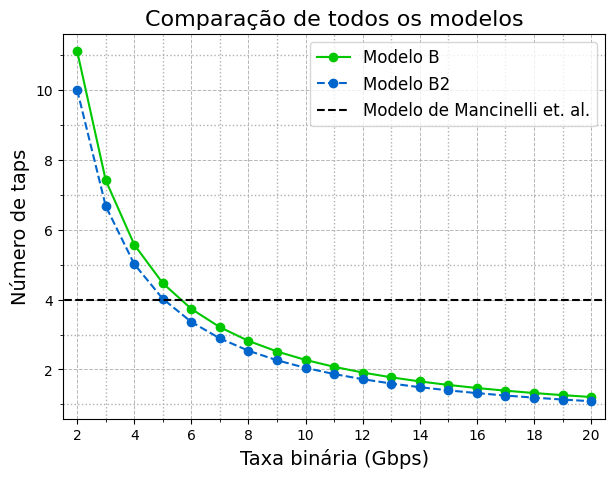

In [32]:
plt.figure(figsize=(7,5))

dtB = 11.25e-12 # Time delay multipler [s]
dtB2 = 12.50e-12 # Time delay multipler [s]
L = 10e3

dLs = 4  #  ΔL in BULs
BArray = np.arange(2,21,1)*1e9

NTB = ((1/BArray + np.abs(L*beta2*BArray))/(dLs*dtB)) # Number of taps (varying dt case B)
NTB2 = ((1/BArray + np.abs(L*beta2*BArray))/(dLs*dtB2)) # Number of taps (varying dt case B2)

plt.plot(BArray*1e-9, NTB, 'o-', label='Modelo B',color='#00C800')
plt.plot(BArray*1e-9, NTB2, 'o--', label='Modelo B2',color='#0066CC')
plt.title('Comparação de todos os modelos', fontsize=16)
plt.xlabel(r'Taxa binária (Gbps)', fontsize=14)
plt.ylabel(r'Número de taps', fontsize=14)
plt.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.9)
plt.grid(which='minor', axis='x', linestyle=':', linewidth=1, alpha=1)
plt.grid(which='minor', axis='y', linestyle=':', linewidth=1, alpha=1)

plt.hlines(4,xmin=0,xmax=21,linestyle='--',color='black',label='Modelo de Mancinelli et. al.')

plt.xlim(1.5,20.5)

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # ticks menores a cada 1 no eixo y
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))  # ticks menores a cada 1 no eixo y
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Mostra apenas inteiros no eixo X

plt.legend(fontsize=12)

plt.savefig("TBUBitrateRobust.pdf", format="pdf")